In [2]:
import numpy as np
import pandas as pd
data = pd.read_excel("C:/Users/jothi/OneDrive/Documents/prodigyDS3.xlsx")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
data.shape

(11162, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
data.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool

In [8]:
data['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [9]:
#Target variable deposit

from sklearn.preprocessing import OneHotEncoder, StandardScaler
cat_col = data.select_dtypes(include=['object']).columns

#Drop target variable
cat_col = cat_col.drop('deposit')
data1=data[cat_col]
data1

,job,marital,education,default,housing,loan,contact,month,poutcome
0,admin.,married,secondary,no,yes,no,unknown,may,unknown
1,admin.,married,secondary,no,no,no,unknown,may,unknown
2,technician,married,secondary,no,yes,no,unknown,may,unknown
3,services,married,secondary,no,yes,no,unknown,may,unknown
4,admin.,married,tertiary,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,unknown
11158,services,married,secondary,no,no,no,unknown,jun,unknown
11159,technician,single,secondary,no,no,no,cellular,aug,unknown
11160,technician,married,secondary,no,no,yes,cellular,may,failure


In [11]:
# using OneHotEncorder for categorical variable
en=OneHotEncoder(drop='first',sparse_output=False)
en_data=en.fit_transform(data1)
num_col=data.select_dtypes(include=np.number).columns
data2=data[num_col]
data2

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


In [12]:
#using scalar for numerical variable
sc=StandardScaler()
sc_data=sc.fit_transform(data2)

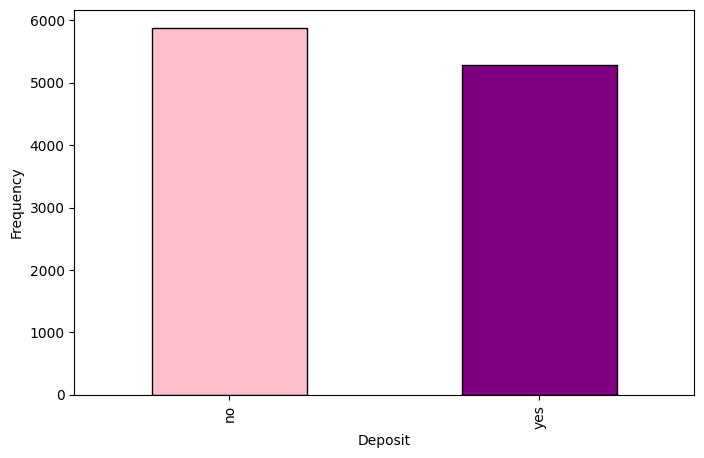

In [15]:
#Target variable
import matplotlib.pyplot as plt
plt.figure(figsize = (8,5))
data['deposit'].value_counts().plot(kind='bar', color =['pink','purple'],edgecolor='black')
plt.xlabel("Deposit")
plt.ylabel("Frequency")
plt.show()

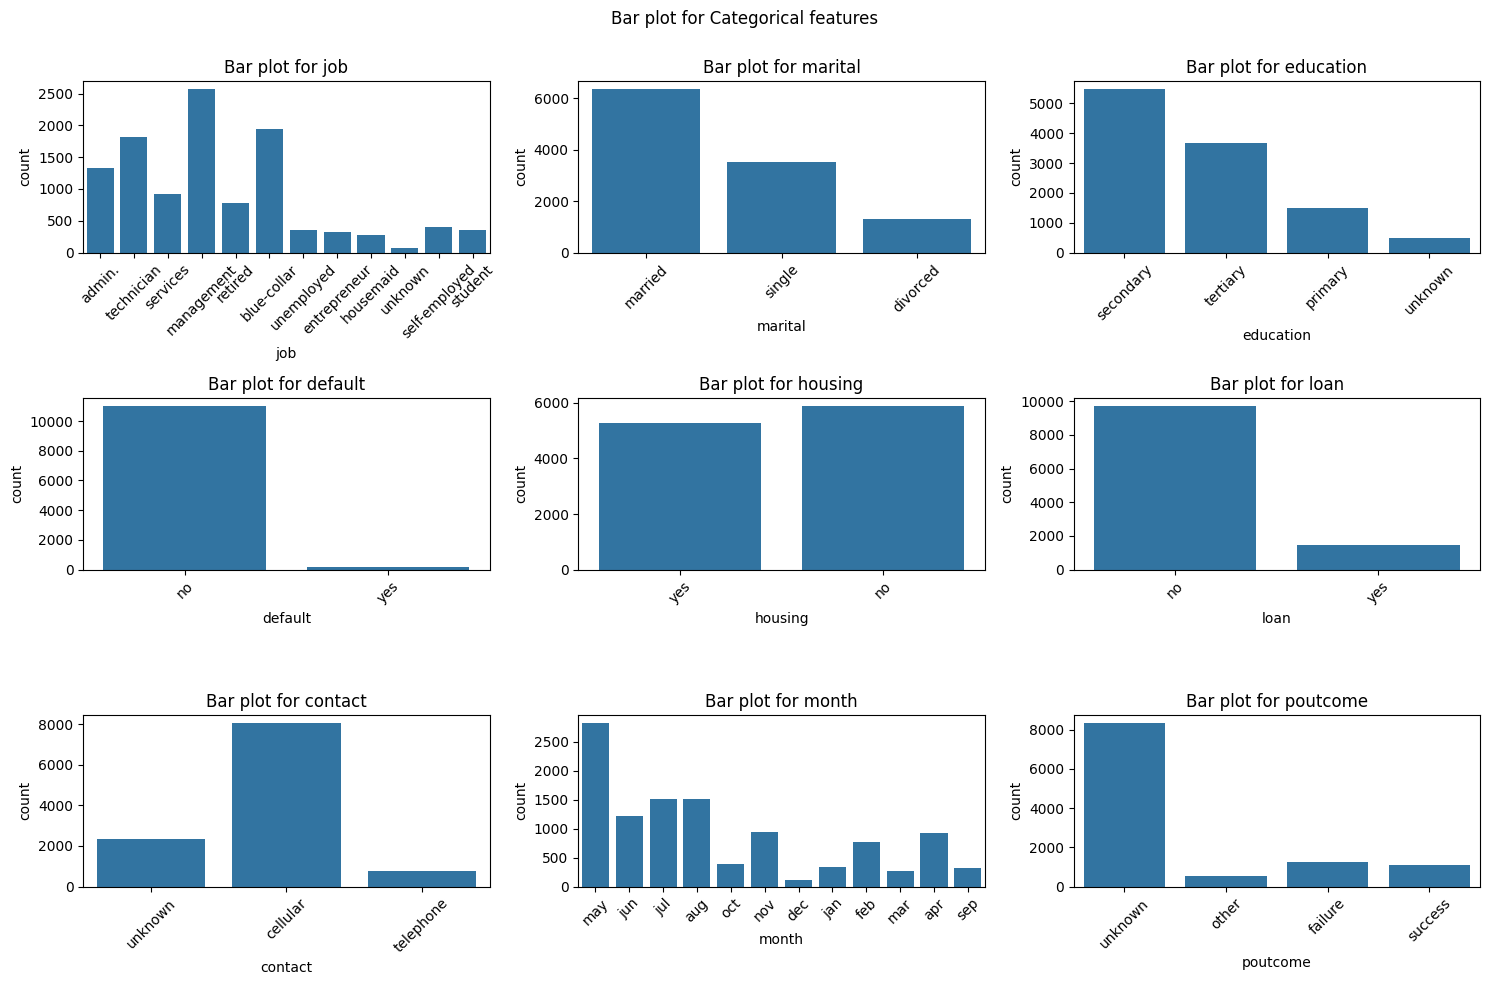

In [16]:
# categorical variable distribution

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
for i,col in enumerate(cat_col,1):
    plt.subplot(3,3,i)
    sns.countplot(x=col,data=data)
    plt.title(f"Bar plot for {col}")
    plt.xticks(rotation=45)
plt.suptitle("Bar plot for Categorical features\n")
plt.tight_layout()
plt.show()

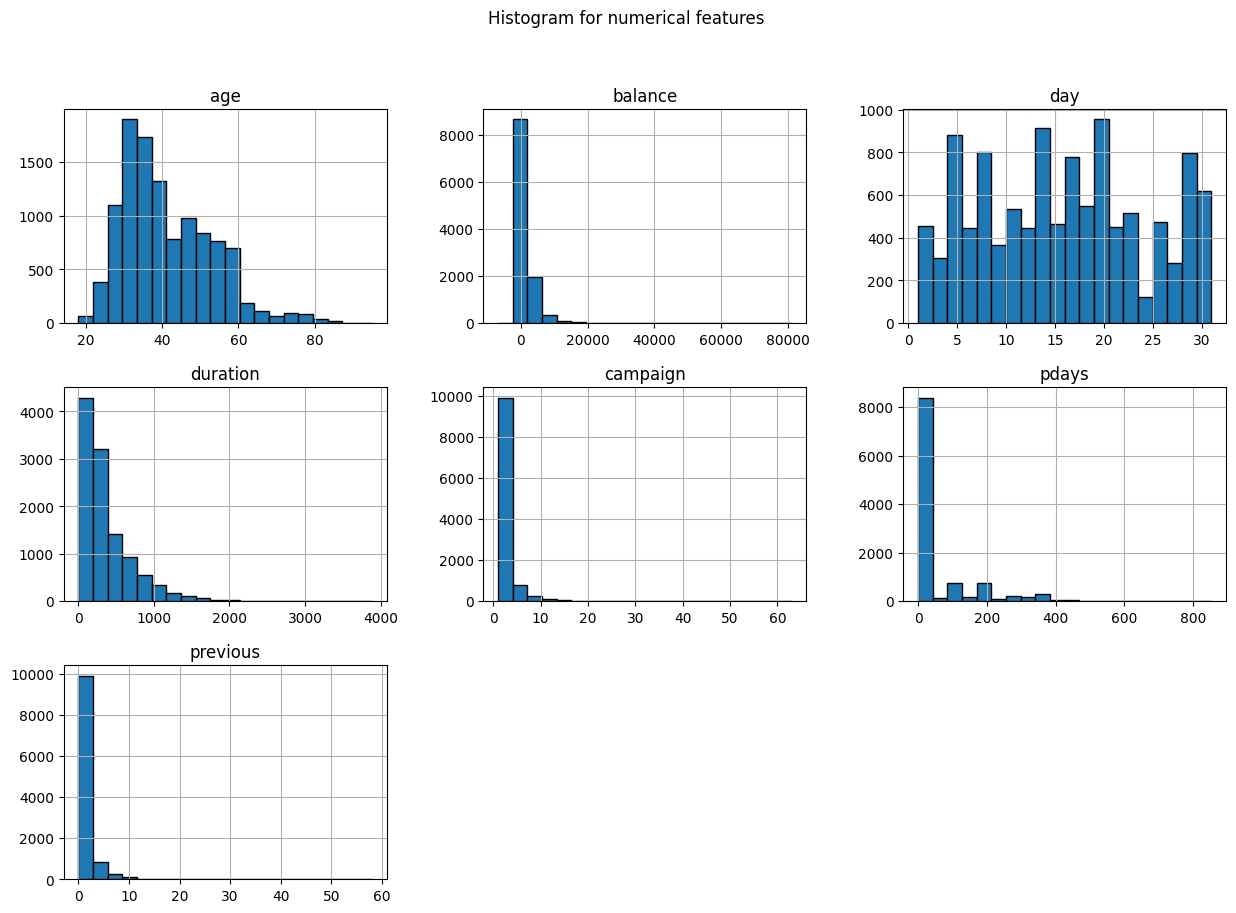

In [17]:
# numerical variable distribution
data[num_col].hist(figsize=(15,10),bins=20,edgecolor='k')
plt.suptitle("Histogram for numerical features")
plt.show()

In [18]:
# combine encoded categorical and scaled numerical features
X=np.hstack((sc_data,en_data))
y=data['deposit'].apply(lambda x: 1 if x=='yes' else 0)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

# Build and prune the Decision Tree Classifier
clf=DecisionTreeClassifier(random_state=42,max_depth=3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# evaluate the pruned model
y_pred=clf.predict(X_test)
print(f"Accuracy score : {accuracy_score(y_test,y_pred)}")
print(f"Precision score : {precision_score(y_test,y_pred)}")
print(f"Recall score : {recall_score(y_test,y_pred)}")
print(f"F1 score : {f1_score(y_test,y_pred)}")
print(f"Confusion matrix:\n{confusion_matrix(y_test,y_pred)}")

Accuracy score : 0.7693685624720108
Precision score : 0.7129629629629629
Recall score : 0.865979381443299
F1 score : 0.7820567075751165
Confusion matrix:
[[794 372]
 [143 924]]


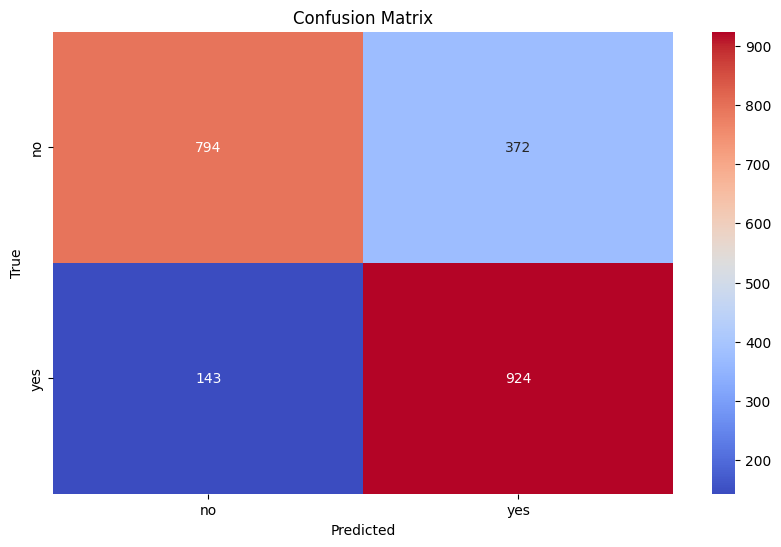

In [20]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns 

#Confusion matrix 
cm = confusion_matrix(y_test, y_pred) 
plt.figure(figsize=(10, 6)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.title('Confusion Matrix') 
plt.show()

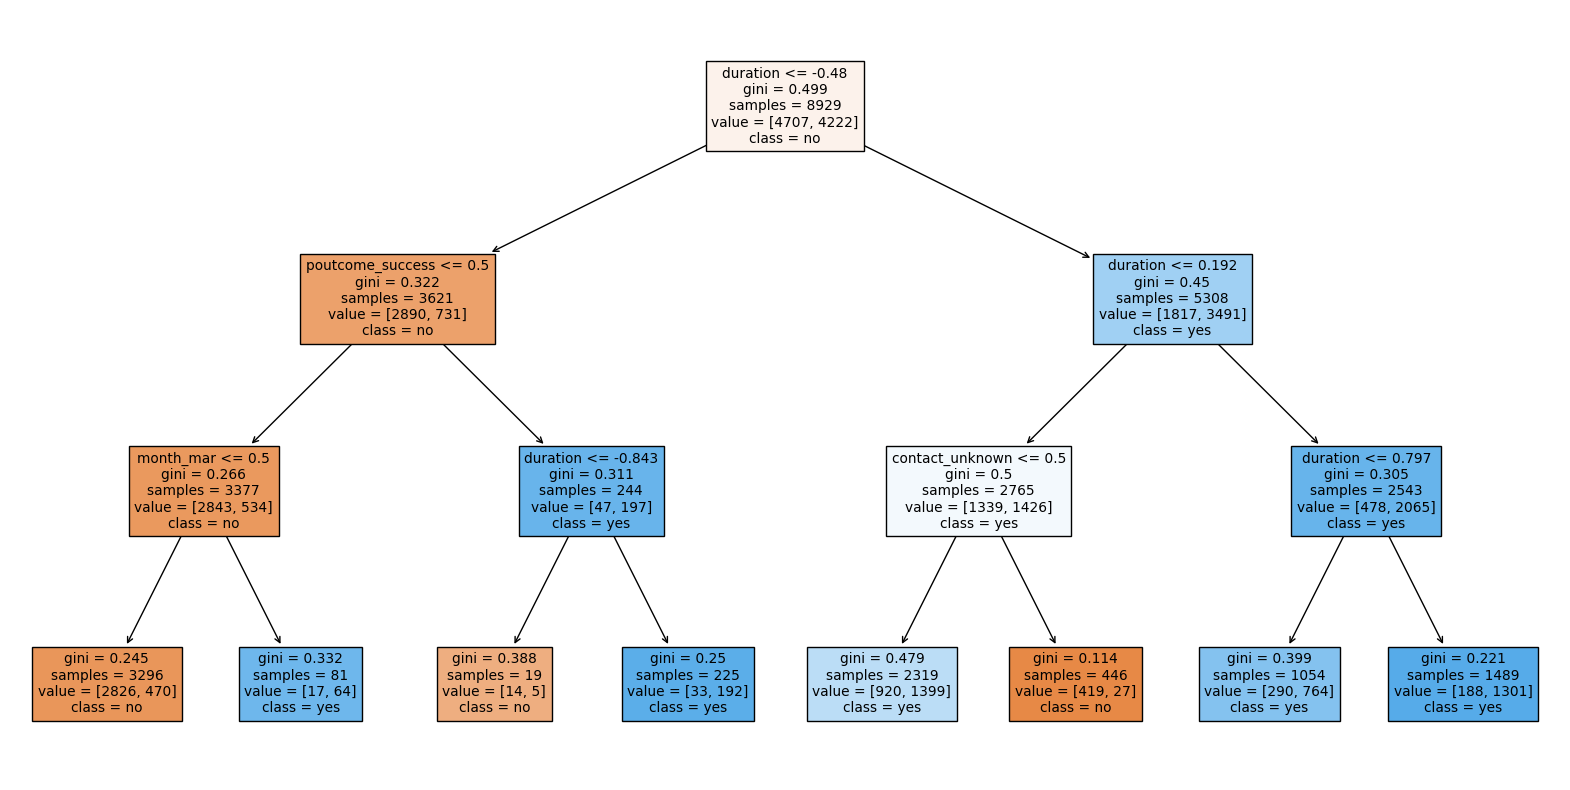

In [21]:
# Visualize the Pruned Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=list(num_col) + en.get_feature_names_out(cat_col).tolist(), class_names=['no', 'yes'])
plt.show()